In [9]:
import itertools

import numpy as np
from qutip import *
# some_file.py
from mpl_toolkits.mplot3d import Axes3D

from qudit import *
# import scipy
import time
import IPython.display as disp
from tqdm.notebook import tqdm
import multiprocess as mp
import matplotlib.pyplot as plt
from discrete_simulation import *
import matplotlib.colors as colors

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
d = 16
m_i = 16
m_c = 16
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,8)
gamma_ratio = 1


simulation16 = DiscreteSimulation(d, m_i,m_c )

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list1616 = [tup[0] for tup in fid_prob_list]
prob_list1616 = [tup[1] for tup in fid_prob_list]

print(1)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_168 = [tup[0] for tup in fid_prob_list]
prob_list_168 = [tup[1] for tup in fid_prob_list]

print(2)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_164 = [tup[0] for tup in fid_prob_list]
prob_list_164 = [tup[1] for tup in fid_prob_list]

print(3)

m_i = 16
m_c = 2
simulation2 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_162 = [tup[0] for tup in fid_prob_list]
prob_list_162 = [tup[1] for tup in fid_prob_list]


print(4)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_168_NC = [tup[0] for tup in fid_prob_list]
prob_list_168_NC = [tup[1] for tup in fid_prob_list]

print(5)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_164_NC = [tup[0] for tup in fid_prob_list]
prob_list_164_NC = [tup[1] for tup in fid_prob_list]

1
2
3
4
5


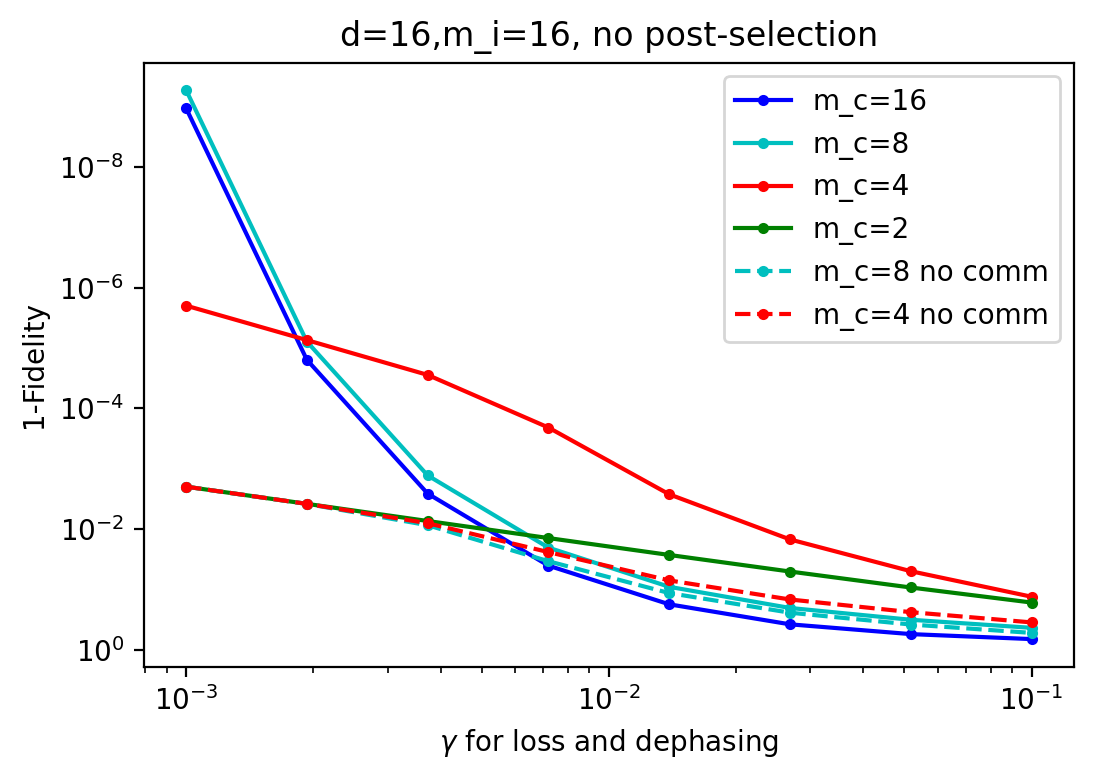

In [4]:
plt.figure(dpi=200)

legend = ["m_c=16","m_c=8","m_c=4", "m_c=2", "m_c=8 no comm", "m_c=4 no comm", "m_c=2 no comm"]

plt.loglog(gamma_list,1-np.array(fid_list1616), 'b.-')
plt.loglog(gamma_list,1-np.array(fid_list_168), 'c.-')
plt.loglog(gamma_list,1-np.array(fid_list_164), 'r.-')
plt.loglog(gamma_list,1-np.array(fid_list_162), 'g.-')
plt.loglog(gamma_list,1-np.array(fid_list_168_NC), 'c.--')
plt.loglog(gamma_list,1-np.array(fid_list_164_NC), 'r.--')
# plt.loglog(gamma_list,1-np.array(fid_list_162_NC), 'k.--')
# plt.loglog(gamma_list,1-np.array(fid_list_filtered), 'r.-')
# plt.loglog(gamma_list,np.array(fail_prob_list), 'g.--')

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\gamma$ for loss and dephasing")  # decay and 1/{gamma_ratio}
plt.ylabel("1-Fidelity")
# plt.ylim([1,1e-5])
plt.legend(legend)
plt.title(f"{d=},{m_i=}, no post-selection")
plt.gca().invert_yaxis()
plt.savefig('plots/discrete_infidelity_for_different_m_c.svg', format='svg')

In [20]:
d = 16
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,11)
gamma_ratio = 1

m_i = 16
m_c = 16
simulation16 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_1616 = [tup[0] for tup in fid_prob_list]
prob_array_1616 = [tup[1] for tup in fid_prob_list]

print(1)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_168 = [tup[0] for tup in fid_prob_list]
prob_array_168 = [tup[1] for tup in fid_prob_list]

print(2)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_164 = [tup[0] for tup in fid_prob_list]
prob_array_164 = [tup[1] for tup in fid_prob_list]

print(3)

m_i = 16
m_c = 2
simulation2 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_162 = [tup[0] for tup in fid_prob_list]
prob_array_162 = [tup[1] for tup in fid_prob_list]


1
2
3


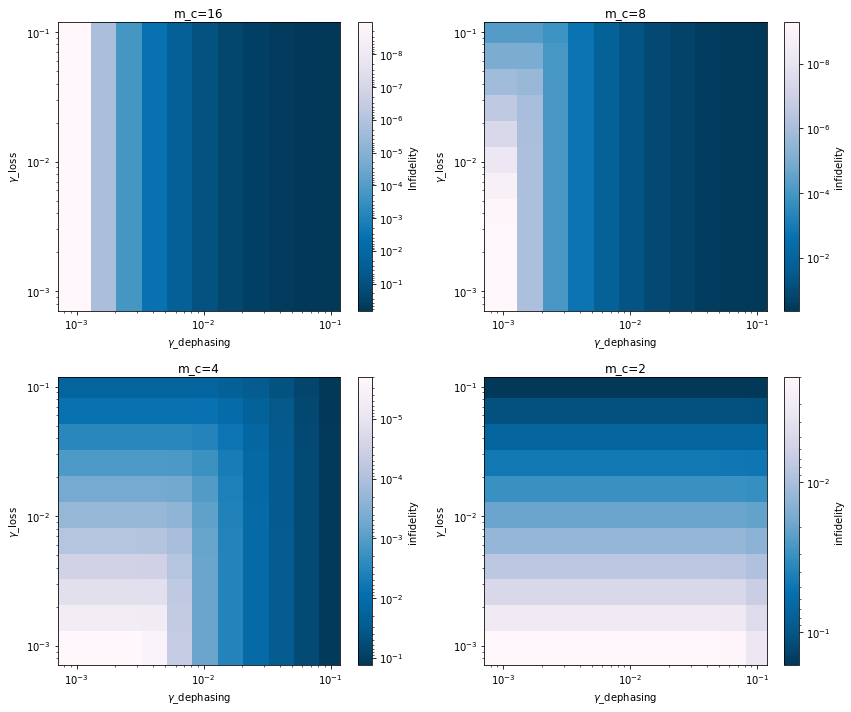

<Figure size 432x288 with 0 Axes>

In [30]:
# Assuming fid_array_168 and prob_array_168 are already reshaped into 2D
fid_array_1616_2d = np.array(fid_array_1616).reshape(len(gamma_list), len(gamma_list))
fid_array_168_2d = np.array(fid_array_168).reshape(len(gamma_list), len(gamma_list))
fid_array_164_2d = np.array(fid_array_164).reshape(len(gamma_list), len(gamma_list))
fid_array_162_2d = np.array(fid_array_162).reshape(len(gamma_list), len(gamma_list))

# Create a grid of gamma values
gamma1, gamma2 = np.meshgrid(gamma_list, gamma_ratio * gamma_list)

vmin, vmax = None, None

# Create a new figure
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Display fidelity data
pcm0 = axs[0,0].pcolormesh(gamma1, gamma2, 1-fid_array_1616_2d, cmap='PuBu', norm=colors.LogNorm(vmin=vmin, vmax=vmax), shading='auto')
fig.colorbar(pcm0, ax=axs[0,0], label='Infidelity').ax.invert_yaxis()
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel('$\gamma$_loss')
axs[0,0].set_xlabel('$\gamma$_dephasing')
axs[0,0].set_title('m_c=16')


# Display m_c=4 data
pcm1 = axs[0,1].pcolormesh(gamma1, gamma2, 1-fid_array_168_2d, cmap='PuBu', norm=colors.LogNorm())
fig.colorbar(pcm1, ax=axs[0,1], label='infidelity').ax.invert_yaxis()
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_ylabel('$\gamma$_loss')
axs[0,1].set_xlabel('$\gamma$_dephasing')
axs[0,1].set_title('m_c=8')

# Display m_c=2 data
pcm2 = axs[1,0].pcolormesh(gamma1, gamma2, 1-fid_array_164_2d, cmap='PuBu', norm=colors.LogNorm())
fig.colorbar(pcm2, ax=axs[1,0], label='infidelity').ax.invert_yaxis()
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,0].set_ylabel('$\gamma$_loss')
axs[1,0].set_xlabel('$\gamma$_dephasing')
axs[1,0].set_title('m_c=4')

# Display m_c=2 data
pcm2 = axs[1,1].pcolormesh(gamma1, gamma2, 1-fid_array_162_2d, cmap='PuBu', norm=colors.LogNorm())
fig.colorbar(pcm2, ax=axs[1,1], label='infidelity').ax.invert_yaxis()
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
axs[1,1].set_ylabel('$\gamma$_loss')
axs[1,1].set_xlabel('$\gamma$_dephasing')
axs[1,1].set_title('m_c=2')

plt.tight_layout()
plt.show()

plt.savefig('plots/2d_infidelity_for_different_m_c.svg', format='svg')